<h1>Edge Detection</h1>
<h2>Question:</h2>
<p>Write a program to perform edge detection using morphological operations. Implement the following steps on the coins image: • Convert the image to grayscale and normalize it to the range [0,1]. • Apply morphological gradient operation (difference between dilation and erosion) to highlight edges. • Use morphological top-hat and black-hat transformations to extract bright and dark edges. • Compare the results with a standard Sobel or Canny edge detector (can use library implementations).</p>

<h3>Import Libraries</h3> 

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h3> 1. Load the coins image in grayscale</h3>

In [5]:
image_8u = cv2.imread("coins.jpeg", cv2.IMREAD_GRAYSCALE)
if image_8u is None:
    print("Error: 'coins.jpg' not found!")
    exit()

# Create a float32 normalized copy for Sobel/Canny comparisons
image_f = image_8u.astype(np.float32) / 255.0

<h3>2. Define a structuring element (kernel) for morphological operations</h3>

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# (a) Morphological Gradient = Dilation - Erosion
morph_gradient = cv2.morphologyEx(image_8u, cv2.MORPH_GRADIENT, kernel)

# (b) Top-Hat = Original - Opening
top_hat = cv2.morphologyEx(image_8u, cv2.MORPH_TOPHAT, kernel)

# (c) Black-Hat = Closing - Original
black_hat = cv2.morphologyEx(image_8u, cv2.MORPH_BLACKHAT, kernel)

<h3>3. Compare with Sobel</h3>

In [8]:
# Sobel on the normalized float image
sobelx = cv2.Sobel(image_f, cv2.CV_32F, 1, 0, ksize=3)
sobely = cv2.Sobel(image_f, cv2.CV_32F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)  # Magnitude of gradient
# Optionally scale to [0,255] for display
sobel_display = np.clip(sobel * 255.0, 0, 255).astype(np.uint8)

<h3>4. Compare with Canny</h3>

In [9]:
# Canny expects 8-bit, so use the original grayscale
canny = cv2.Canny(image_8u, 100, 200)

<h3>5. Display results</h3>

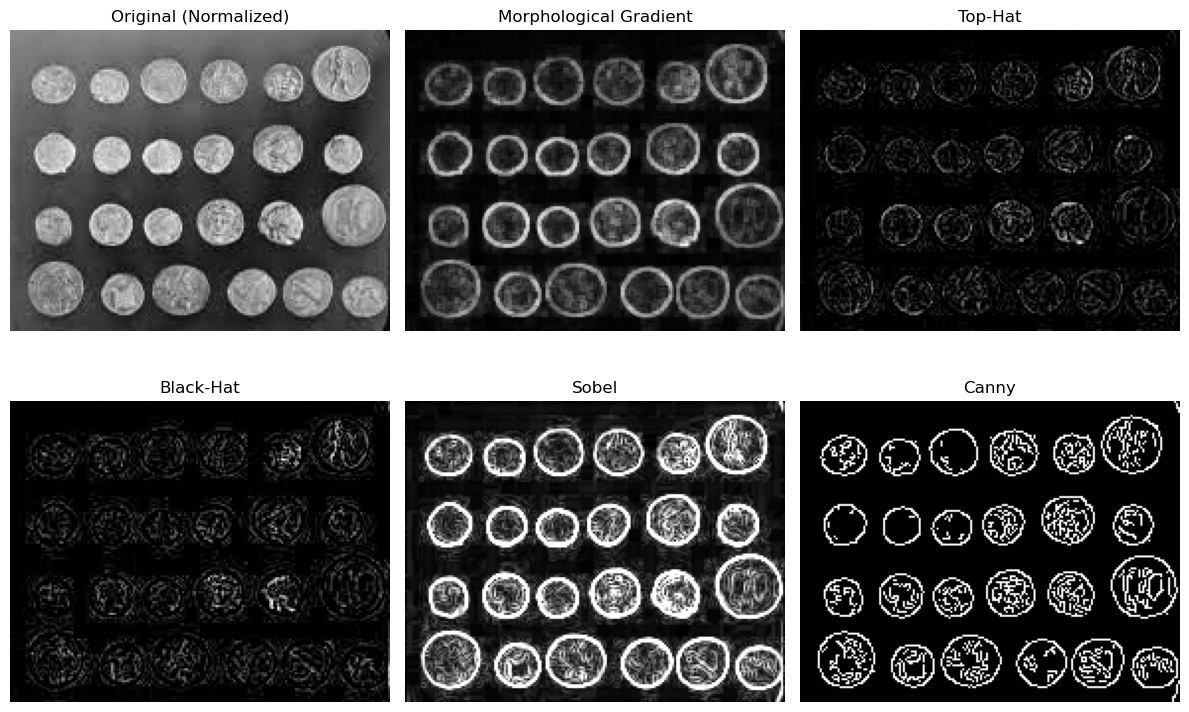

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Original normalized
axes[0, 0].imshow(image_f, cmap="gray")
axes[0, 0].set_title("Original (Normalized)")
axes[0, 0].axis("off")

# Morphological Gradient
axes[0, 1].imshow(morph_gradient, cmap="gray")
axes[0, 1].set_title("Morphological Gradient")
axes[0, 1].axis("off")

# Top-Hat
axes[0, 2].imshow(top_hat, cmap="gray")
axes[0, 2].set_title("Top-Hat")
axes[0, 2].axis("off")

# Black-Hat
axes[1, 0].imshow(black_hat, cmap="gray")
axes[1, 0].set_title("Black-Hat")
axes[1, 0].axis("off")

# Sobel
axes[1, 1].imshow(sobel_display, cmap="gray")
axes[1, 1].set_title("Sobel")
axes[1, 1].axis("off")

# Canny
axes[1, 2].imshow(canny, cmap="gray")
axes[1, 2].set_title("Canny")
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()


<h3>References : </h3>
<ul>
    <li><a href = "https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html">Morphological Operations</a></li>
    <li><a href = "https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html">Canny Edge Detection</a></li>
    <li><a href = "https://docs.opencv.org/4.x/d2/d2c/tutorial_sobel_derivatives.html">Sobel</a></li>
</ul>

<h3>Conclusion:</h3>
<ul>
    <li>Canny Edge detection detects the boundary of coins as well as the marks on the coins</li>
    <li>Sobel succeeded in detecting the coin boundary as wellas marks on the coin but with some thicke boundaries</li>
    <li>Comparing these two with the morphological operations, we can see that Morphological gradient finds the coin boundaries only while top and black hat fins the marks on the coin as well as some coin boundaries. We can combine all the three to get a result near to Sobel or Canny </li>
</ul>